<a href="https://colab.research.google.com/github/andrei-shal/aitch/blob/main/lab_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$ f(x) = ||Ax-y||^2 = (Ax-y)^T(Ax-y) $$
$$ D_f(x) = D[(Ax-y)^T(Ax-y)] =(Adx)^T(Ax−y)+(Ax−y)^TAdx = 2(Ax-y)^TAdx $$
$$ Df=(\nabla f)^Tdx $$
$$ (\nabla f)^T=2(Ax−y)^TA $$
$$ \nabla f(x) = 2A^T(Ax−y) $$

## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$ \nabla f(x) = 2A^T(Ax−y)  = 0$$
$$ A^TAx=A^Ty $$
$$ x=(A^TA)^{-1}A^Ty $$

### 2.1 Реализация прямого решения

In [1]:
import numpy as np
import matplotlib.pyplot as plt

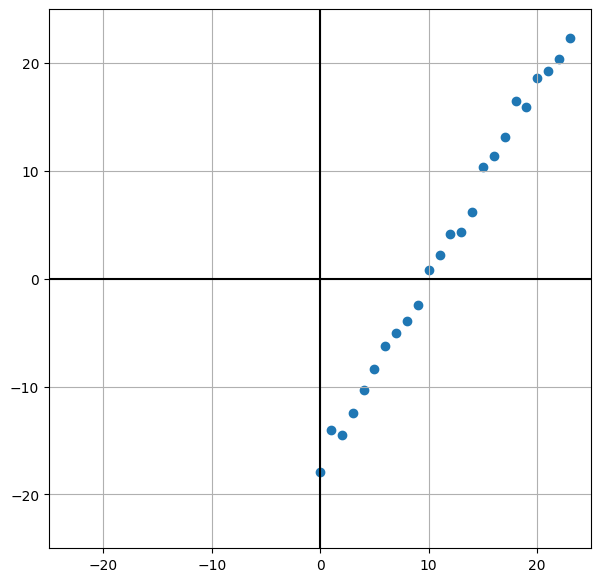

In [2]:
# ваши параметры по вариантам
a_orig = 1.8 # по формуле (-1)^n * 0.1 * n, n - номер в списке группы
b_orig = -18 # по формуле n*(-1)^(n+1), где n - номер в списке группы
random_state = 18 # х, где х - номер в списке группы

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])

np.random.seed(random_state)

A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)

In [3]:
A, y

(array([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.],
        [12.,  1.],
        [13.,  1.],
        [14.,  1.],
        [15.,  1.],
        [16.,  1.],
        [17.,  1.],
        [18.,  1.],
        [19.,  1.],
        [20.,  1.],
        [21.,  1.],
        [22.,  1.],
        [23.,  1.],
        [24.,  1.]]),
 array([-17.92057156, -14.00979764, -14.53489215, -12.43948202,
        -10.35730216,  -8.37660856,  -6.19109651,  -5.00575121,
         -3.9363867 ,  -2.44590646,   0.80545771,   2.21644284,
          4.17461975,   4.29832867,   6.20524313,  10.34551948,
         11.38186781,  13.13723871,  16.46704686,  15.90967588,
         18.60136507,  19.23547318,  20.43204834,  22.37799776,
         26.08351955]))

### Вопрос - зачем был дописан вектор единиц справа к иксу?

ответ - для учета свободного члена

In [4]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат
a_b_analytical =  np.linalg.inv(A.T @ A) @ A.T @ y
a_b_analytical

array([  1.7722498 , -17.40883557])

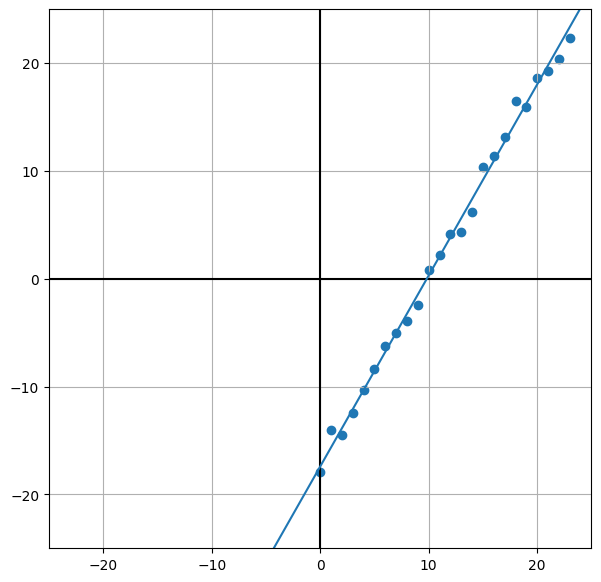

In [5]:
# постройте линию которая вышла рядом с изначальными данными

# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# линия которая обучилась
# нужно вместо троеточий подсчитать значения y которые
# получаются при полученных параметрах линии
# в точках x1 = -25, x2 = 25, этим мы построим линию по 2 точкам
x_line = np.array([-25, 25])
y_line = a_b_analytical[0] * x_line + a_b_analytical[1]
ax.plot(x_line, y_line)

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

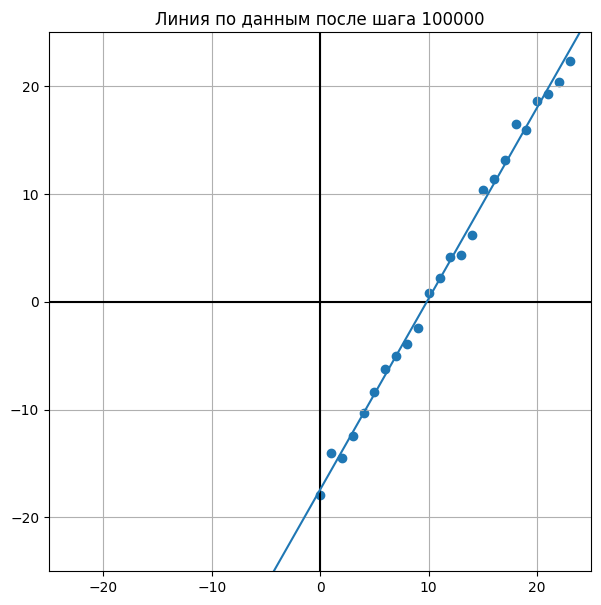

[  1.77208189 -17.40884586]


In [171]:
alpha = 0.00020331

a_b = np.array([0.0, 0.0])

for i in range(100000):
    # получаем градиент
    grad = 2 * A.T @ (A @ a_b - y)
    # получаем антиградиент
    antigrad = -grad
    # обновляем наши параметры линии
    a_b += alpha * antigrad

f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# - линия которая обучилась
ax.plot([-25, 25], [a_b[0]*-25 + a_b[1], a_b[0]*25 + a_b[1]])
ax.set_title(f'Линия по данным после шага {i+1}')
plt.show()

print(a_b)